In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.xception import Xception 
#from keras.applications.vgg16 import VGG16
from keras.applications.xception import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
train_path = '/content/drive/MyDrive/DATASET/TRAIN'
test_path = '/content/drive/MyDrive/DATASET/TEST'

In [ ]:
xcept = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
for layer in xcept.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/DATASET/TRAIN/*')

In [ ]:
len(folders)

5

In [ ]:
x = Flatten()(xcept.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=xcept.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255, 
    shear_range = 0.2, 
    zoom_range=0.2, 
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DATASET/TRAIN',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 634 images belonging to 5 classes.


In [ ]:
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DATASET/TEST',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 361 images belonging to 5 classes.


In [ ]:
history = model.fit_generator(
    training_set, 
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
40/40 [==============================] - 538s 13s/step - loss: 4.3537 - accuracy: 0.6151 - val_loss: 1.4400 - val_accuracy: 0.8449
Epoch 2/10
40/40 [==============================] - 32s 813ms/step - loss: 1.0108 - accuracy: 0.8754 - val_loss: 1.0092 - val_accuracy: 0.9058
Epoch 3/10
40/40 [==============================] - 32s 799ms/step - loss: 0.3347 - accuracy: 0.9558 - val_loss: 0.7070 - val_accuracy: 0.9252
Epoch 4/10
40/40 [==============================] - 33s 826ms/step - loss: 0.2521 - accuracy: 0.9590 - val_loss: 0.7868 - val_accuracy: 0.9003
Epoch 5/10
40/40 [==============================] - 32s 822ms/step - loss: 0.4799 - accuracy: 0.9448 - val_loss: 2.2691 - val_accuracy: 0.8006
Epoch 6/10
40/40 [==============================] - 33s 826ms/step - loss: 0.5245 - accuracy: 0.9290 - val_loss: 1.2380 - val_accuracy: 0.9030
Epoch 7/10
40/40 [==============================] - 32s 816ms/step - loss: 0.2830 - accuracy: 0.9621 - val_loss: 1.3699 - val_accuracy: 0.9141


In [ ]:
from keras.models import load_model
model.save('CNN_XCEPT.h5')

To do predictions on the trained model I need to load the best saved model and pre-process the image and pass the image to the model for output.

from keras.preprocessing import imageimg = image.load_img("image.jpeg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)from keras.models import load_model
saved_model = load_model("CNN_VGG.h5")output = saved_model.predict(img)

In [ ]:
model.evaluate(training_set), model.evaluate(test_set)

23/23 [==============================] - 14s 596ms/step - loss: 1.9749 - accuracy: 0.8892


([0.6440097689628601, 0.9384858012199402],
 [1.9749234914779663, 0.8891966938972473])

In [ ]:
y_val_org = []
for i in range( test_set.__len__() ):
    y_val_org.extend(
        test_set.__getitem__( i )[1] 
    )
y_val_org = np.array(y_val_org)
y_val_org = np.argmax(y_val_org, axis=1)

In [ ]:
y_val_org


array([4, 4, 2, 3, 4, 4, 2, 4, 3, 0, 3, 2, 2, 2, 1, 4, 1, 2, 3, 2, 1, 2,
       1, 2, 2, 0, 1, 0, 2, 4, 3, 3, 2, 4, 4, 0, 3, 1, 3, 0, 4, 4, 4, 1,
       3, 2, 1, 4, 1, 1, 1, 0, 3, 4, 0, 1, 3, 4, 0, 4, 2, 2, 2, 4, 0, 4,
       2, 2, 0, 3, 3, 1, 3, 3, 4, 3, 2, 1, 0, 3, 1, 2, 4, 0, 2, 1, 2, 4,
       1, 4, 2, 0, 0, 3, 4, 1, 4, 0, 3, 2, 3, 1, 4, 4, 0, 2, 4, 1, 2, 2,
       4, 4, 2, 0, 1, 3, 0, 4, 1, 1, 3, 2, 2, 3, 2, 1, 0, 0, 3, 2, 0, 3,
       2, 4, 4, 1, 1, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 4, 3, 1, 4, 1, 2, 2,
       4, 2, 2, 4, 0, 1, 2, 2, 4, 2, 4, 3, 4, 3, 0, 4, 1, 2, 3, 1, 2, 4,
       3, 3, 4, 0, 0, 0, 0, 0, 2, 0, 2, 0, 3, 0, 2, 1, 0, 1, 2, 1, 4, 0,
       2, 0, 3, 1, 0, 4, 0, 2, 1, 1, 3, 3, 4, 4, 1, 1, 3, 0, 4, 1, 2, 3,
       1, 0, 4, 3, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3, 4, 4, 3, 4, 2, 3, 2,
       1, 0, 4, 2, 4, 0, 2, 0, 0, 0, 1, 4, 2, 1, 4, 1, 2, 4, 3, 4, 0, 4,
       2, 0, 0, 4, 2, 1, 2, 4, 1, 0, 3, 3, 1, 3, 3, 0, 2, 2, 2, 1, 1, 4,
       3, 0, 0, 3, 2, 0, 0, 0, 0, 3, 2, 3, 4, 2, 0,

In [ ]:
ypreds = model.predict(test_set)
ypreds = np.argmax(ypreds, axis=1)
ypreds

array([4, 4, 2, 3, 4, 4, 2, 4, 3, 0, 3, 2, 2, 2, 4, 4, 1, 2, 3, 2, 4, 2,
       1, 4, 2, 0, 1, 0, 2, 4, 3, 3, 2, 4, 4, 0, 3, 1, 3, 0, 4, 4, 4, 1,
       3, 2, 4, 4, 1, 4, 4, 0, 3, 4, 0, 1, 3, 4, 0, 4, 2, 2, 2, 4, 0, 4,
       2, 2, 0, 3, 3, 4, 3, 3, 4, 3, 2, 1, 0, 3, 3, 2, 4, 0, 2, 1, 2, 4,
       1, 4, 2, 0, 4, 4, 4, 4, 4, 0, 3, 4, 3, 4, 4, 4, 0, 2, 4, 1, 2, 2,
       4, 4, 2, 0, 1, 3, 0, 4, 1, 4, 3, 2, 2, 3, 2, 4, 0, 0, 3, 2, 0, 3,
       2, 4, 4, 4, 1, 4, 2, 3, 3, 4, 2, 1, 2, 3, 2, 4, 3, 3, 4, 4, 2, 2,
       4, 2, 2, 4, 0, 1, 2, 2, 4, 2, 4, 3, 4, 3, 0, 4, 2, 2, 3, 4, 2, 4,
       3, 3, 4, 0, 0, 0, 0, 0, 2, 0, 2, 0, 3, 0, 2, 1, 0, 4, 2, 1, 4, 0,
       2, 0, 3, 1, 0, 4, 4, 2, 1, 1, 3, 3, 4, 4, 1, 1, 3, 0, 4, 1, 2, 3,
       1, 0, 4, 3, 0, 2, 4, 2, 2, 0, 0, 1, 2, 0, 3, 4, 4, 3, 4, 2, 3, 2,
       4, 0, 4, 2, 4, 0, 2, 2, 0, 0, 4, 4, 4, 4, 4, 1, 2, 4, 3, 2, 0, 4,
       2, 0, 0, 4, 2, 3, 2, 4, 4, 0, 3, 3, 1, 3, 3, 0, 2, 2, 2, 4, 4, 4,
       3, 0, 0, 4, 0, 2, 0, 0, 0, 3, 2, 3, 4, 4, 0,

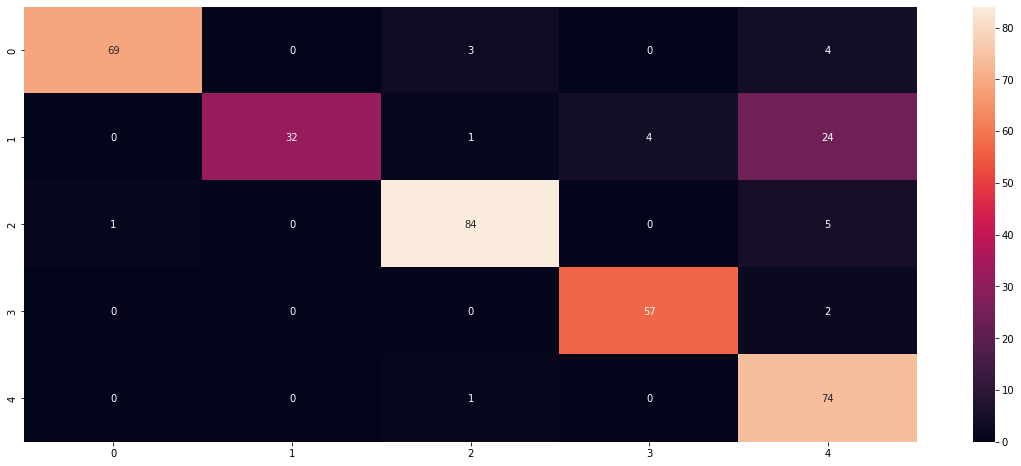




              precision    recall  f1-score   support

           0       0.99      0.91      0.95        76
           1       1.00      0.52      0.69        61
           2       0.94      0.93      0.94        90
           3       0.93      0.97      0.95        59
           4       0.68      0.99      0.80        75

    accuracy                           0.88       361
   macro avg       0.91      0.86      0.87       361
weighted avg       0.91      0.88      0.87       361



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cf_matrix = confusion_matrix(y_val_org, ypreds)

plt.figure(figsize=(20,8))
ax = sns.heatmap(cf_matrix, annot=True, fmt='g')
plt.show()

print("\n\n")
print(classification_report(y_val_org, ypreds))